# Exercises: Linear Regression

Before getting started with coding, read through this [article](https://towardsdatascience.com/simple-linear-regression-model-using-python-machine-learning-eab7924d18b4) and follow the instructions within the article to download the dataset.

Use this notebook to code along with the article.

## Getting Started

Import the libraries you need to start working with the dataset and make a dataframe out of the CSV in the dataset.

In [29]:
import numpy as np 
import pandas as pd
df= pd.read_csv("Company_data.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Run `shape()`, `info()`, and `describe()` to see what is going on with the dataset.

In [30]:
print("SHAPE:")
print(df.shape)
print("===")
print("INFO:")
print(df.info())
print("===")
print("DESCRIBE")
print(df.describe())

SHAPE:
(200, 4)
===
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
===
DESCRIBE
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


## Visualizing Data

Import the necessary libraries to make the same pairplots as the author. Pairplots are used by analysts to see any relationships that may exist between the x- and y-variables.

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\kelly\Anaconda3\envs\PythonData\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


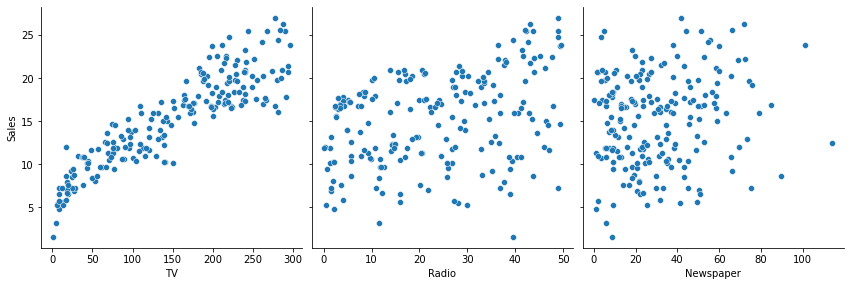

In [32]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'],
                y_vars='Sales', size=4,aspect=1, kind='scatter')
plt.show()

#Other "kind" values
    #kde
    #hist
    #reg

Try out the heatmap next!

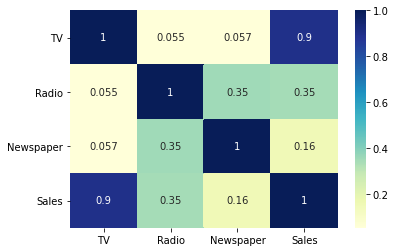

In [33]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

#Other color maps
    #YlGnBu = yellow/greeen/blue
    #Blues
    #BuPu - blue/purple
    #Greens

## Time for Linear Regression

Follow the four steps in the article to perform linear regression.

In [34]:
# Step 1 is to assign your x and y
X=df['TV']
y=df['Sales']



In [35]:
# Step 2 is to create your train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                            test_size = 0.3, random_state = 100)

In [36]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [37]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [38]:
X_test.head()

126      7.8
104    238.2
99     135.2
92     217.7
111    241.7
Name: TV, dtype: float64

In [43]:
# Step 3 is to build the model. Remember to import any libraries you may need
import statsmodels.api as sm

#adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

#fitting the regression line using 'OLS' regression function - model now lives in the variable 'lr'
lr = sm.OLS(y_train, X_train_sm).fit()

#printing the parameters
lr.params


const    6.948683
TV       0.054546
dtype: float64

c:\Users\kelly\Anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


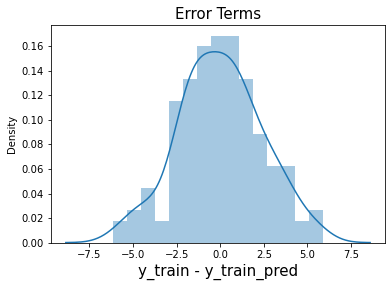

In [52]:
# Step 4 is to perform residual analysis

#Predicting y_value using training data of X
y_train_pred = lr.predict(X_train_sm)

#Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

#plot data
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

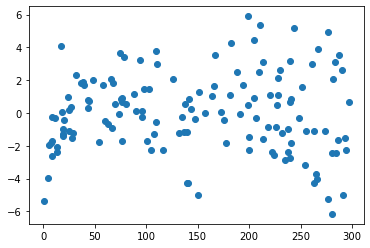

In [53]:
#Looking for any patterns in the residuals
plt.scatter(X_train, res)
plt.show()

## Evaluate Your Model

Use your model to make some predictions on the test data.

## Summarize Your Results

Make note of your answers to each of the following questions by editing the cell.

1. Did you get the same coefficients and p-values as the author?
2. Did you get the same R-squared values as the author?
3. Did you get the same F-statistic value and significance as the author?